In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import regex as re
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #jeeva
# file1 = '/content/drive/MyDrive/FOC Project 2/dblp.v10/dblp.v10/dblp-ref/dblp-ref-0.json'
# file2 = '/content/drive/MyDrive/FOC Project 2/dblp.v10/dblp.v10/dblp-ref/dblp-ref-1.json'
# file3 = '/content/drive/MyDrive/FOC Project 2/dblp.v10/dblp.v10/dblp-ref/dblp-ref-2.json'
# file4 = '/content/drive/MyDrive/FOC Project 2/dblp.v10/dblp.v10/dblp-ref/dblp-ref-3.json'

**Loading the json files**

In [ ]:
#nelson
file1 = '/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-0.json'
file2 = '/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-1.json'
file3 = '/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-2.json'
file4 = '/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-3.json'

In [ ]:
data = []
chunk_size = 100

In [ ]:
#Taking chunks of 5000 data from file 1
df = pd.read_json(file1, lines = True, chunksize = chunk_size)
for chunk1 in df:
  data.append(chunk1)
  break

In [ ]:
#Taking chunks of 5000 data from file 2
df = pd.read_json(file2, lines = True, chunksize = chunk_size)
for chunk2 in df:
  data.append(chunk2)
  break

In [ ]:
#Taking chunks of 5000 data from file 3
df = pd.read_json(file3, lines = True, chunksize = chunk_size)
for chunk3 in df:
  data.append(chunk3)
  break

In [ ]:
#Taking chunks of 5000 data from file 4
df = pd.read_json(file4, lines = True, chunksize = chunk_size)
for chunk4 in df:
  data.append(chunk4)
  break

# **Combining the Data sets**

In [ ]:
#Dataframes are combined to form a new dataframe.
df_combined = pd.concat(data)

# **Pre-Processing of the data**

In [ ]:
df_combined.head(10)

,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266
5,NaN,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,international conference on computer graphics ...,2009,005ce28f-ed77-4e97-afdc-a296137186a1
6,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",2,NaN,Vectorial fast correlation attacks.,,2004,00638a94-23bf-4fa6-b5ce-40d799c65da7
7,NaN,"[Guzin Ulutas, Mustafa Ulutas, Vasif V. Nabiyev]",0,"[5626736c-e434-4e2d-8405-54940fab88ab, 8e87e87...",Improved Secret Image Sharing Method By Encodi...,international symposium on computer and inform...,2011,00701b05-684f-45f9-b281-425abfec482c
8,NaN,"[Pranay Chaudhuri, Hussein Thompson]",0,NaN,A Self-Stabilizing Algorithm for Finding the C...,parallel and distributed processing techniques...,2003,00745041-3636-4d18-bbec-783c4278c40d
9,NaN,"[Dominik Szajerman, Adam Jurczyński]",0,"[3fcd7cdc-20e6-4ea3-a41c-db126fcc5cfe, bf3a11c...",Fur Visualisation for Computer Game Engines an...,international conference on computer vision an...,2014,00964544-cbe2-4da9-bb5a-03333160eb34


In [ ]:
df_combined.shape

(400, 8)

In [ ]:
df_combined.info()
# Only 2 columns have integer type. Except 'n_citation' and 'year' all are objects.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   abstract    293 non-null    object
 1   authors     400 non-null    object
 2   n_citation  400 non-null    int64 
 3   references  336 non-null    object
 4   title       400 non-null    object
 5   venue       400 non-null    object
 6   year        400 non-null    int64 
 7   id          400 non-null    object
dtypes: int64(2), object(6)
memory usage: 28.1+ KB


In [ ]:
#Checking for Null values in each column
df_combined.isna().sum()

abstract      107
authors         0
n_citation      0
references     64
title           0
venue           0
year            0
id              0
dtype: int64

**We found that there are 362865 Null values in references and 530475 Null Values in abstract column out of the 3079007 rows of data.**

**There are 362865 papers in the data without any references. They wrote it without refering to anyone. ie, 11.7% of the papers are without any reference**

In [ ]:
# Replacing blank values with DataFrame.replace() methods.
df_combined = df_combined.replace(r'^\s*$', np.nan, regex=True)
df_combined.isna().sum()

abstract      107
authors         0
n_citation      0
references     64
title           0
venue          84
year            0
id              0
dtype: int64

**There are 506699 Null values in the venue Column that was empty before. We can understand that there are 506699 papers in this 3079007 rows of data that are not published in any Conference.**

**16.4 % of the paper in the data haven't published the paper in any venue**

In [ ]:
df_combined.head(10)

,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,NaN,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,NaN,1998,0040b022-1472-4f70-a753-74832df65266
5,NaN,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,international conference on computer graphics ...,2009,005ce28f-ed77-4e97-afdc-a296137186a1
6,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",2,NaN,Vectorial fast correlation attacks.,NaN,2004,00638a94-23bf-4fa6-b5ce-40d799c65da7
7,NaN,"[Guzin Ulutas, Mustafa Ulutas, Vasif V. Nabiyev]",0,"[5626736c-e434-4e2d-8405-54940fab88ab, 8e87e87...",Improved Secret Image Sharing Method By Encodi...,international symposium on computer and inform...,2011,00701b05-684f-45f9-b281-425abfec482c
8,NaN,"[Pranay Chaudhuri, Hussein Thompson]",0,NaN,A Self-Stabilizing Algorithm for Finding the C...,parallel and distributed processing techniques...,2003,00745041-3636-4d18-bbec-783c4278c40d
9,NaN,"[Dominik Szajerman, Adam Jurczyński]",0,"[3fcd7cdc-20e6-4ea3-a41c-db126fcc5cfe, bf3a11c...",Fur Visualisation for Computer Game Engines an...,international conference on computer vision an...,2014,00964544-cbe2-4da9-bb5a-03333160eb34


In [ ]:
u = df_combined['year'].unique()
paper_year = {}
for year in u:
  paper_year[year] = df_combined[df_combined['year']==year].shape[0]
  # print(f"total number paper in year= {year}",df_combined[df_combined['year']==year].shape[0])
max_value = max(paper_year, key=paper_year.get)
for key, val in paper_year.items():
  max_value = max(paper_year, key=paper_year.get)
print(f"Maximum no of Paper is presented in the year {max_value} = {paper_year[max_value]}")

Maximum no of Paper is presented in the year 2016 = 43


**There is no need of abstract column for our analysis**

In [ ]:
df_combined.columns

Index(['abstract', 'authors', 'n_citation', 'references', 'title', 'venue',
       'year', 'id'],
      dtype='object')

In [ ]:
#Dropping abstract column
df_combined.drop(['abstract'], axis=1, inplace = True)
df_combined.head(5)

,authors,n_citation,references,title,venue,year,id
0,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,NaN,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,NaN,1998,0040b022-1472-4f70-a753-74832df65266


**Taking the sample for further Analysis**

In [ ]:
sample_size = 5

In [ ]:
df_sample = df_combined.sample(sample_size, random_state = 30071998)
df_sample

,authors,n_citation,references,title,venue,year,id
87,"[Russell A. Poldrack, Paul C. Fletcher, Richar...",288,[],Guidelines for reporting an fMRI study,NeuroImage,2008,4ab9b413-e370-4bde-87e4-046e10458f0b
80,"[Jack Rogers, Matthew H. Davis]",0,"[246bc37a-1ac5-415b-9e43-9be781df59db, 2470f8c...",Inferior Frontal Cortex Contributions to the R...,Journal of Cognitive Neuroscience,2017,1032c089-6dc4-40b7-bfe3-fec28c7d358d
47,"[Wei Wang, Wei Zhang]",0,"[19392837-7972-4aa7-a860-d6c90458f7b8, 4f48b37...",Adaptive Spatial Modulation Using Huffman Coding,global communications conference,2016,0a13520f-b058-43ff-ad3b-5e292422887e
93,"[Wenju Li, Kaixue Ma, Shouxian Mou]",0,[],A Ku-band high-isolation SPDT switch in 0.35um...,NaN,2016,144ca465-2ce0-47d5-9588-54df33b83536
51,[Mark Northover],50,[382b7b47-1cd7-4236-8457-42c3e527f1f2],Online discussion boards - friend or foe?,NaN,2002,02ad7019-1c4c-4a23-85ac-086e4cfcfcb2


In [ ]:
# df_sample = df_combined.iloc[:sample_size]

**For checking which all authors were involved in different papers. So that we could check our graph is correct or not.**

# Analysis 3b

In [ ]:
a = df_sample['authors'].explode().tolist()
R_a = {}                                    # R_a --- Repeating authors
f_d = {p:a.count(p) for p in a}             #f_d --- Frequency Dictionary
for key, val in f_d.items():
  if val > 1:
    R_a[key] = val
  else:
    pass
R_a                         #Will return the no of Repeated Authors in different papers with the no of times he is repeated

{}

In [ ]:
max_author = sorted(R_a, key=R_a.get, reverse=True)[:5]
max_author

[]

**Pre Processing for Known Author Graph For Analysis 2**

In [ ]:
# Taking out the unique values in authors column
Unique_authors = df_sample['authors'].explode().unique()
print(len(Unique_authors))

14


In [ ]:
#Changing the format of unique authors so that they can plotted in the graph easily.
author_format = ['A{}'.format(i) for i in range(1,len(Unique_authors)+1)]

**Author reference dictionary for identifying the author that he/she is mapped too**

In [ ]:
#Combining the unique authors with the author format 
author_dic = dict(zip(Unique_authors,author_format))

In [ ]:
# Applying the converted formating to the data
df_sample["Author_cleaned"]=df_sample["authors"].apply(lambda x: pd.Series(x).map(author_dic).tolist())
df_sample.head(10)

,authors,n_citation,references,title,venue,year,id,Author_cleaned
87,"[Russell A. Poldrack, Paul C. Fletcher, Richar...",288,[],Guidelines for reporting an fMRI study,NeuroImage,2008,4ab9b413-e370-4bde-87e4-046e10458f0b,"[A1, A2, A3, A4, A5, A6]"
80,"[Jack Rogers, Matthew H. Davis]",0,"[246bc37a-1ac5-415b-9e43-9be781df59db, 2470f8c...",Inferior Frontal Cortex Contributions to the R...,Journal of Cognitive Neuroscience,2017,1032c089-6dc4-40b7-bfe3-fec28c7d358d,"[A7, A8]"
47,"[Wei Wang, Wei Zhang]",0,"[19392837-7972-4aa7-a860-d6c90458f7b8, 4f48b37...",Adaptive Spatial Modulation Using Huffman Coding,global communications conference,2016,0a13520f-b058-43ff-ad3b-5e292422887e,"[A9, A10]"
93,"[Wenju Li, Kaixue Ma, Shouxian Mou]",0,[],A Ku-band high-isolation SPDT switch in 0.35um...,NaN,2016,144ca465-2ce0-47d5-9588-54df33b83536,"[A11, A12, A13]"
51,[Mark Northover],50,[382b7b47-1cd7-4236-8457-42c3e527f1f2],Online discussion boards - friend or foe?,NaN,2002,02ad7019-1c4c-4a23-85ac-086e4cfcfcb2,[A14]


In [ ]:
dic = {}
for i in df_sample['Author_cleaned']:
  for p in i:
    if p not in dic.keys():
      dic[p] = [x for x in i if x != p] # To remove self loop
    else:   
      a = [x for x in i if x != p] # the authors that are present in different paper when added together other authors along with them also gets combined so we removed that.
      dic[p] = dic[p] + [item for item in a if item not in dic[p]] 
# print(dic)

# **Visualization Nomenclature**

*   Author - White Node with Dark orange Node edges
*   Paper refered - White Node with Light blue Node edges
*   Paper being refered - Gold Node with white Node edges
*   Venue - Lime Green Node







# **Known Author Graph For Analysis 2**

In [ ]:
# import networkx as nx
# G = nx.Graph(dic)
# pos = nx.circular_layout(G)
# plt.figure(figsize=(8,8)) 
# nx.draw(G,pos, node_color = 'red')

# Circular plot is made to check for the interconnections between the authors in different papers.

# **Known Author Graph**

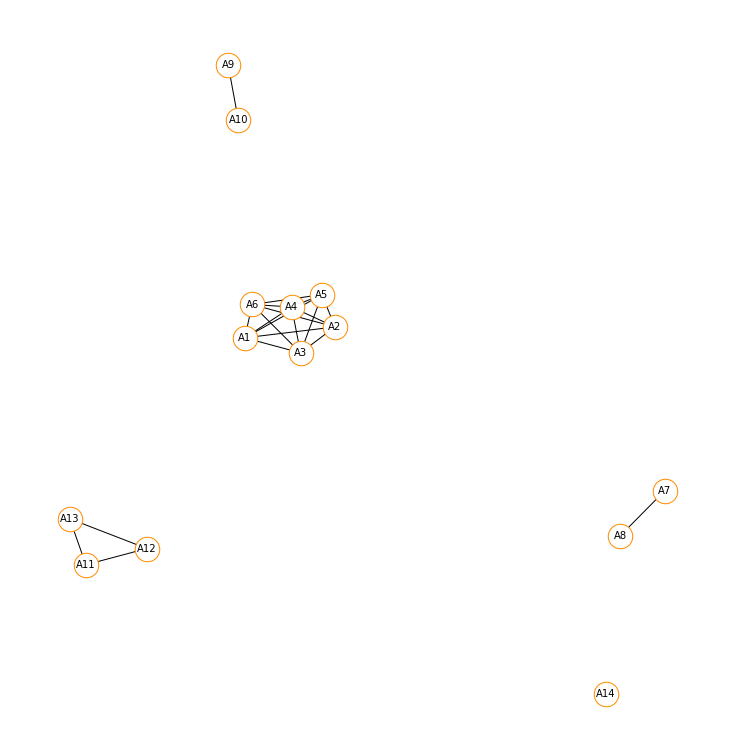

In [ ]:
G = nx.Graph(dic)
plt.figure(figsize=(10,10)) 
my_pos = nx.spring_layout(G, k= .13, iterations=10)
nx.draw(G,pos = my_pos,with_labels = True,edgecolors='darkorange', font_size = 10, node_size = 600, node_color = 'white')
plt.show()

**The cliques that without iterations through the individual cliques**

In [ ]:
len(list(nx.find_cliques(G)))

5

**Function to write the data into network_summary loadable format.**

In [ ]:
def edge_lst_text(edges, file_name):
  Author_edgelist = []
  for i in edges:
    a=list(re.findall('\d+',str(i)))
    Author_edgelist.append([int(a[0]),int(a[1])])

  path = r"/content/drive/MyDrive/" + file_name + ".txt"
  with open(path, 'w') as fp:
    for item in Author_edgelist:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')
  print('Done')

In [ ]:
edge_lst_text(G.edges(), 'Author_edge_lst')

Done


**# Analysis 2**

In [ ]:
def find_cliques_size_k(g, k):
 count = 0
 for clique in nx.find_cliques(g):
        if len(clique) == k:
            count += 1
        elif len(clique) > k:
           count += len(list(itertools.combinations(clique, k)))
           return count

print('The Number of Cliques of size 3 :', find_cliques_size_k(G, 3))
print('The Number of Cliques of size 4 :', find_cliques_size_k(G, 4))
print('The Number of Cliques of size 5 :', find_cliques_size_k(G, 5))
print('The Number of Cliques of size 6 :', find_cliques_size_k(G, 4))

The Number of Cliques of size 3 : 20
The Number of Cliques of size 4 : 15
The Number of Cliques of size 5 : 6
The Number of Cliques of size 6 : 15


**Pre Processing for Paper Paper Citation Graph For Analysis 3a**

In [ ]:
ref = list(df_sample['references'].explode().unique())
cleanedList = [x for x in ref if str(x) != 'nan']

In [ ]:
#Adding the 
paper_unique = list(set(cleanedList + df_sample['id'].to_list()))
paper_format = ['P{}'.format(i) for i in range(1,len(paper_unique)+1)]

**Dictionary for mapping the Papers with the paper format**

In [ ]:
paper_dic=dict(zip(paper_unique,paper_format))
# paper_dic

In [ ]:
# Checking whether the NaN values are removed while assigned the paper formating
ref_unq = list(df_sample['references'].explode().unique())
print(ref_unq)
print(len(ref_unq))
for i in ref_unq:
  if str(i) == 'nan' or str(i) == 'NaN':
    ref_unq.remove(i)
  else:
    pass

print(len(ref_unq))

[nan, '246bc37a-1ac5-415b-9e43-9be781df59db', '2470f8c1-dca7-4801-82c3-76389d07fcb2', '60190ab3-5104-43f3-9fbd-5d8d00ff296c', '89be9d96-002c-4647-a222-28920788d783', '8d30f7b1-6daf-411b-b822-a6e47f7d1628', 'aa750fe3-9b58-4093-9544-420081028d6b', 'cbc15180-809e-4372-851d-f0d07b662d7c', 'd162389a-ecf0-4c86-a4c6-e4abbe7e4537', 'd9254a09-c2aa-4e31-a066-184171d87833', 'dffda390-7db2-4a1d-90e9-a1aa59383001', 'e483f641-f7f8-43dc-a649-ced3e3d67b06', '19392837-7972-4aa7-a860-d6c90458f7b8', '4f48b371-d692-4a79-ad46-a9159dfdd672', '748a2ab3-8b5f-4d0a-9e2d-af685089843a', '870d11c0-8636-4f9a-b265-1016474bebff', 'b4022bac-a157-4a3a-9cab-050b7c5a49c3', 'c9c5a9c0-f1b7-4286-8538-13476ae32e60', '382b7b47-1cd7-4236-8457-42c3e527f1f2']
19
18


In [ ]:
# Checking the unique value in the paper to the paper that is being referred multiple times.
paper_unique = list(set(ref_unq + df_sample['id'].to_list()))
paper_non_unique = ref_unq + df_sample['id'].to_list()
list_var=['P{}'.format(i) for i in range(1,len(paper_unique)+1)]
print("Paper unique",len(paper_unique))
print("Paper non unique", len(paper_non_unique))

Paper unique 23
Paper non unique 23


In [ ]:
# Applying the converted formating to the data
df_sample["Paper_reference"]   =  df_sample["references"].apply(lambda x: pd.Series(x).map(paper_dic).to_list())
# Applying the converted formating to the data
df_sample["paper Id"]=df_sample["id"].apply(lambda x: pd.Series(x).map(paper_dic))

<ipython-input-145-bfd01ed169e8>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_sample["Paper_reference"]   =  df_sample["references"].apply(lambda x: pd.Series(x).map(paper_dic).to_list())


In [ ]:
df_sample.head(10)

,authors,n_citation,references,title,venue,year,id,Author_cleaned,Paper_reference,paper Id
87,"[Russell A. Poldrack, Paul C. Fletcher, Richar...",288,[],Guidelines for reporting an fMRI study,NeuroImage,2008,4ab9b413-e370-4bde-87e4-046e10458f0b,"[A1, A2, A3, A4, A5, A6]",[],P3
80,"[Jack Rogers, Matthew H. Davis]",0,"[246bc37a-1ac5-415b-9e43-9be781df59db, 2470f8c...",Inferior Frontal Cortex Contributions to the R...,Journal of Cognitive Neuroscience,2017,1032c089-6dc4-40b7-bfe3-fec28c7d358d,"[A7, A8]","[P1, P8, P18, P20, P19, P21, P16, P7, P15, P22...",P9
47,"[Wei Wang, Wei Zhang]",0,"[19392837-7972-4aa7-a860-d6c90458f7b8, 4f48b37...",Adaptive Spatial Modulation Using Huffman Coding,global communications conference,2016,0a13520f-b058-43ff-ad3b-5e292422887e,"[A9, A10]","[P5, P6, P4, P2, P10, P11]",P14
93,"[Wenju Li, Kaixue Ma, Shouxian Mou]",0,[],A Ku-band high-isolation SPDT switch in 0.35um...,NaN,2016,144ca465-2ce0-47d5-9588-54df33b83536,"[A11, A12, A13]",[],P12
51,[Mark Northover],50,[382b7b47-1cd7-4236-8457-42c3e527f1f2],Online discussion boards - friend or foe?,NaN,2002,02ad7019-1c4c-4a23-85ac-086e4cfcfcb2,[A14],[P23],P13


In [ ]:
id_ref = dict(zip(df_sample['paper Id'],df_sample['Paper_reference']))
new_id_ref = {}
for key, val in id_ref.copy().items():
  if str(val) == '[]' or str(val) == '[nan]':
    del id_ref[key]
  else:
    pass
# id_ref
# Removing the nan values from the keys so that it can be considered for plotting the graph. NaN values are not considered since the those papers are not published in any conference.

# **Paper Citation Graph**

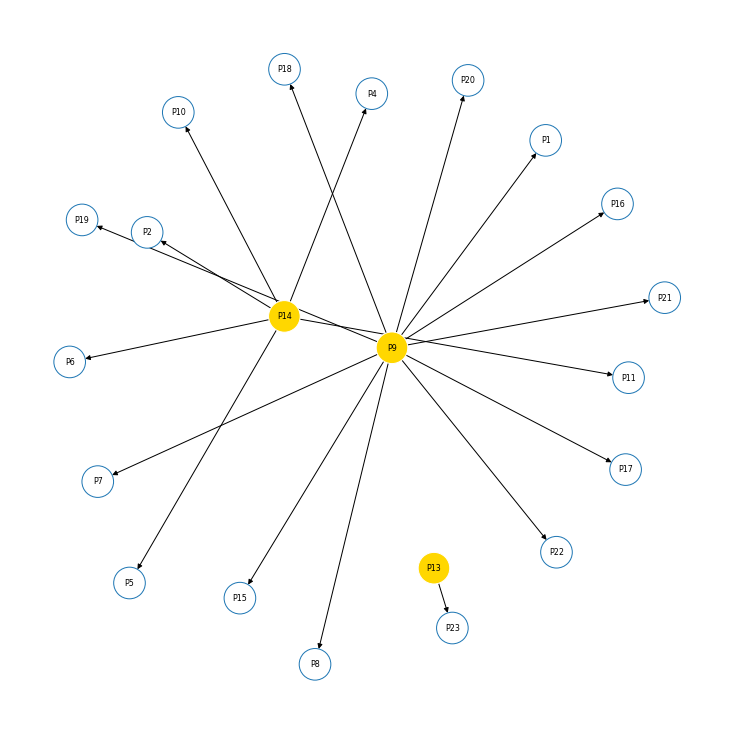

In [ ]:
p = nx.DiGraph(id_ref)

plt.rcParams["figure.figsize"] = (10,10)
color_map = ["gold" if node in id_ref.keys() else 'white' for node in p]
color_edges = ["white" if node in id_ref.keys() else 'C0' for node in p]
nx.draw(p, with_labels = True,font_size = 8, edgecolors = color_edges, node_size = 1000, node_color = color_map)
plt.show()


In [ ]:
edge_lst_text(p.edges(), 'paper_citation_edge_lst')

Done


**Analysis 3a**

**Top 5 papers that are being refered the most in the data**

In [ ]:
degree_lst = nx.in_degree_centrality(p)
max_ref_paper = sorted(degree_lst, key=degree_lst.get, reverse=True)[:5]
print(max_ref_paper)

['P1', 'P8', 'P18', 'P20', 'P19']


In [ ]:
# for id, elem in enumerate(df_sample['paper Id']):
#   for i in max_ref_paper:
#     if i in elem:
#       print(df_sample['title'][id])
# For the sample data the most cited paper is not present since each referred paper is referred only ones.

**Pre Processing for Author-Venue-graph For Analysis 3b**

In [ ]:
#Checking for the unique values
df_sample['venue'].unique()

array(['NeuroImage', 'Journal of Cognitive Neuroscience',
       'global communications conference', nan], dtype=object)

In [ ]:
df_sample['venue']

87                           NeuroImage
80    Journal of Cognitive Neuroscience
47     global communications conference
93                                  NaN
51                                  NaN
Name: venue, dtype: object

In [ ]:
uniq_venue = df_sample['venue'].unique().tolist()
for i in uniq_venue:
  if i == '' or str(i) == 'NaN':
    uniq_venue.remove(i)
  else:
    pass

In [ ]:
# Multiplying a 10 to the venue_formatting since when we are considering 20k+ the numbers in the network summary file will be same for the authors and venue.
Venue_formating = ['V{}'.format(i + sample_size*10) for i in range(1,len(uniq_venue)+1)]

**Venue reference Dictionary**

In [ ]:
v_dic = dict(zip(uniq_venue, Venue_formating))
# v_dic

In [ ]:
#Applying the formatting to the data
df_sample["Venue_cleaned"]=df_sample['venue'].apply(lambda x: pd.Series(x).map(v_dic))
# df_sample

In [ ]:
#Combining the value venue and authors who presented the paper in that venue togehther.
v_dic = dict(zip(df_sample['Venue_cleaned'], df_sample['Author_cleaned']))
for i in v_dic.copy():
  if type(i) == float:
    v_dic.pop(i)
# v_dic

In [ ]:
#Combining the Venue_cleaned column and year so that it can be plotted in the graph for edge label.
venue_year = dict(zip(df_sample['Venue_cleaned'], df_sample['year']))

# **Author Venue Graph**

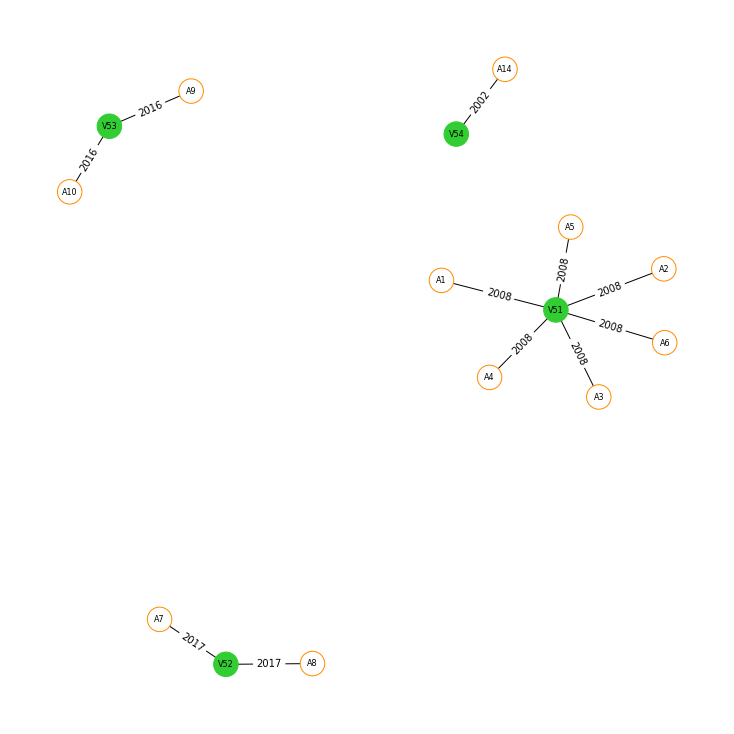

In [ ]:
v = nx.Graph(v_dic)

edge_labeled = {}
for edge in v.edges():
  if edge[0] in venue_year.keys():
    edge_labeled[edge] = venue_year[edge[0]]
  else:
    pass

plt.rcParams["figure.figsize"] = (10,10)
pos = nx.spring_layout(v, k= .15, iterations=13)
color_map = ["limegreen" if node in v_dic.keys() else 'white' for node in v]
color_edges = ["limegreen" if node in v_dic.keys() else 'darkorange' for node in v]
nx.draw(v,pos, with_labels = True,font_size = 8, edgecolors = color_edges, node_size = 600, node_color = color_map)
nx.draw_networkx_edge_labels(v,pos, edge_labels= edge_labeled, font_color='black')
plt.axis('off')
plt.show()

In [ ]:
edge_lst_text(v.edges(), 'venue_author_edge_lst_sample')

Done
